<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



In [4]:
def frequency_chart(data):
    fig, ax = plt.subplots()
    ax.hist(data, 50,cumulative = False, color = '#539caf')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title('Частотный график')

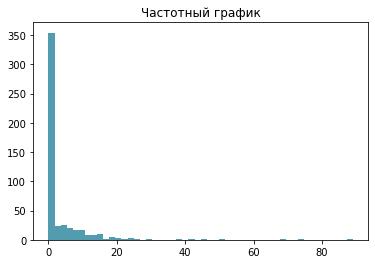

In [5]:
frequency_chart(data['CRIM'])#Геометрическое распределение

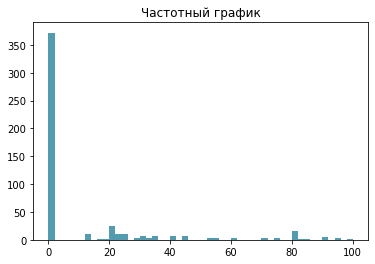

In [6]:
frequency_chart(data['ZN'])#Геометриеское распределение

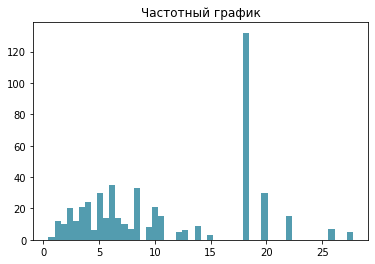

In [7]:
frequency_chart(data['INDUS'])#Никакое

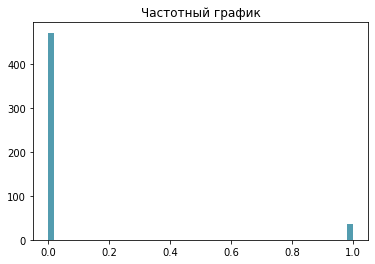

In [8]:
frequency_chart(data['CHAS'])#распределение Бернулли

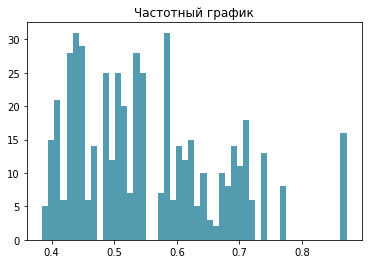

In [9]:
frequency_chart(data['NOX'])#Биномиальное распределение - ближе всего

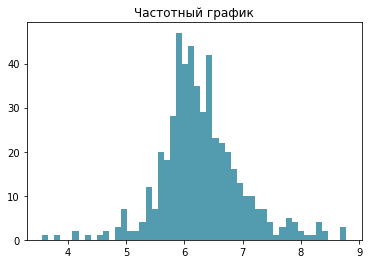

In [10]:
frequency_chart(data['RM'])#Нормальное распределение ближе всего

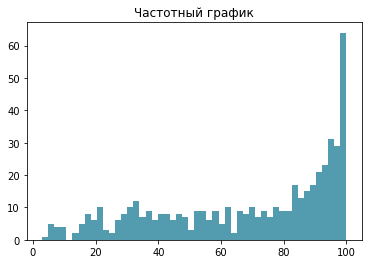

In [11]:
frequency_chart(data['AGE'])#Геометрическое, только обратное)

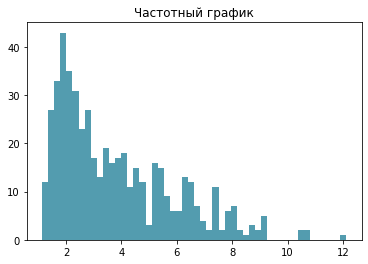

In [12]:
frequency_chart(data['DIS'])#Логнормальное распределение(слева от высокого показателя есть значения меньше)

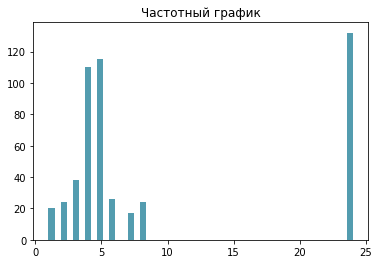

In [13]:
frequency_chart(data['RAD'])#Никакое

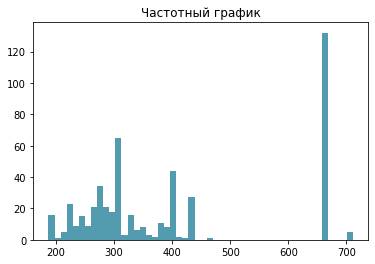

In [14]:
frequency_chart(data['TAX'])#никакое

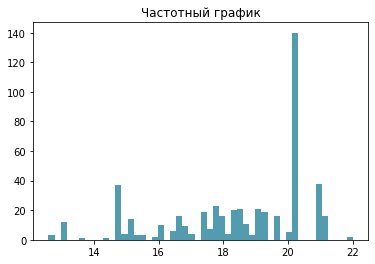

In [15]:
frequency_chart(data['PTRATIO'])#никакое

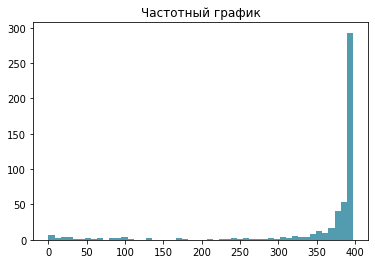

In [16]:
frequency_chart(data['B'])#Геометрическое, только обратное

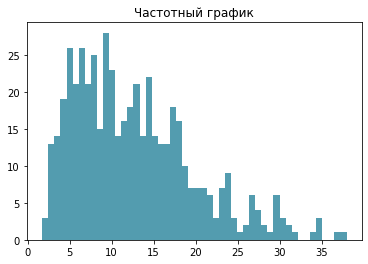

In [17]:
frequency_chart(data['LSTAT'])#Логнормальное распределение

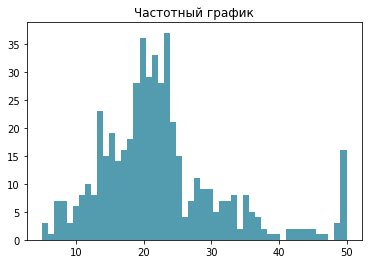

In [18]:
frequency_chart(data['MEDV'])#Похоже на нормальное или биномиальное, но шапочка "проседает" и значение 49-50 высокое. Поэтому не подходит

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

In [19]:
data.corr()
#Максимальное коррелирующие атрибуты это LSTAT(процент населения статуса ниже среднего или бедного), 
#здесь обратная корреляция - чем ниже процент, тем выше цена.
#Второй по максимум RM, прямая корреляция, чем больше среднее количество на дом, тем выше цена

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
lstat = np.array(data['LSTAT']).reshape(-1,1)
medv = np.array(data['MEDV']).reshape(-1,1)

In [22]:
#Разделить данные на 80% тренировочных, 20% тестовых
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    lstat,
    medv,
    test_size = 0.2
)

In [23]:
#Составить модель линейной регрессии
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
predicted_y = model.predict(X_test)

In [25]:
#Посчитать ошибку модели на тестовых данных
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

34.68016361115869
4.286975253628194


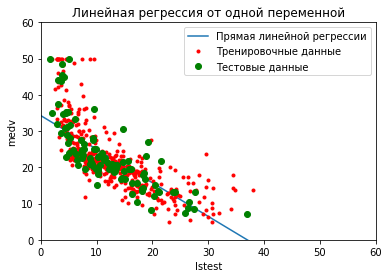

In [26]:
#Сделать точечный график данных и полученной прямой линейной регрессии
plt.xlabel('lstest')
plt.ylabel('medv')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(0, 200, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [27]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


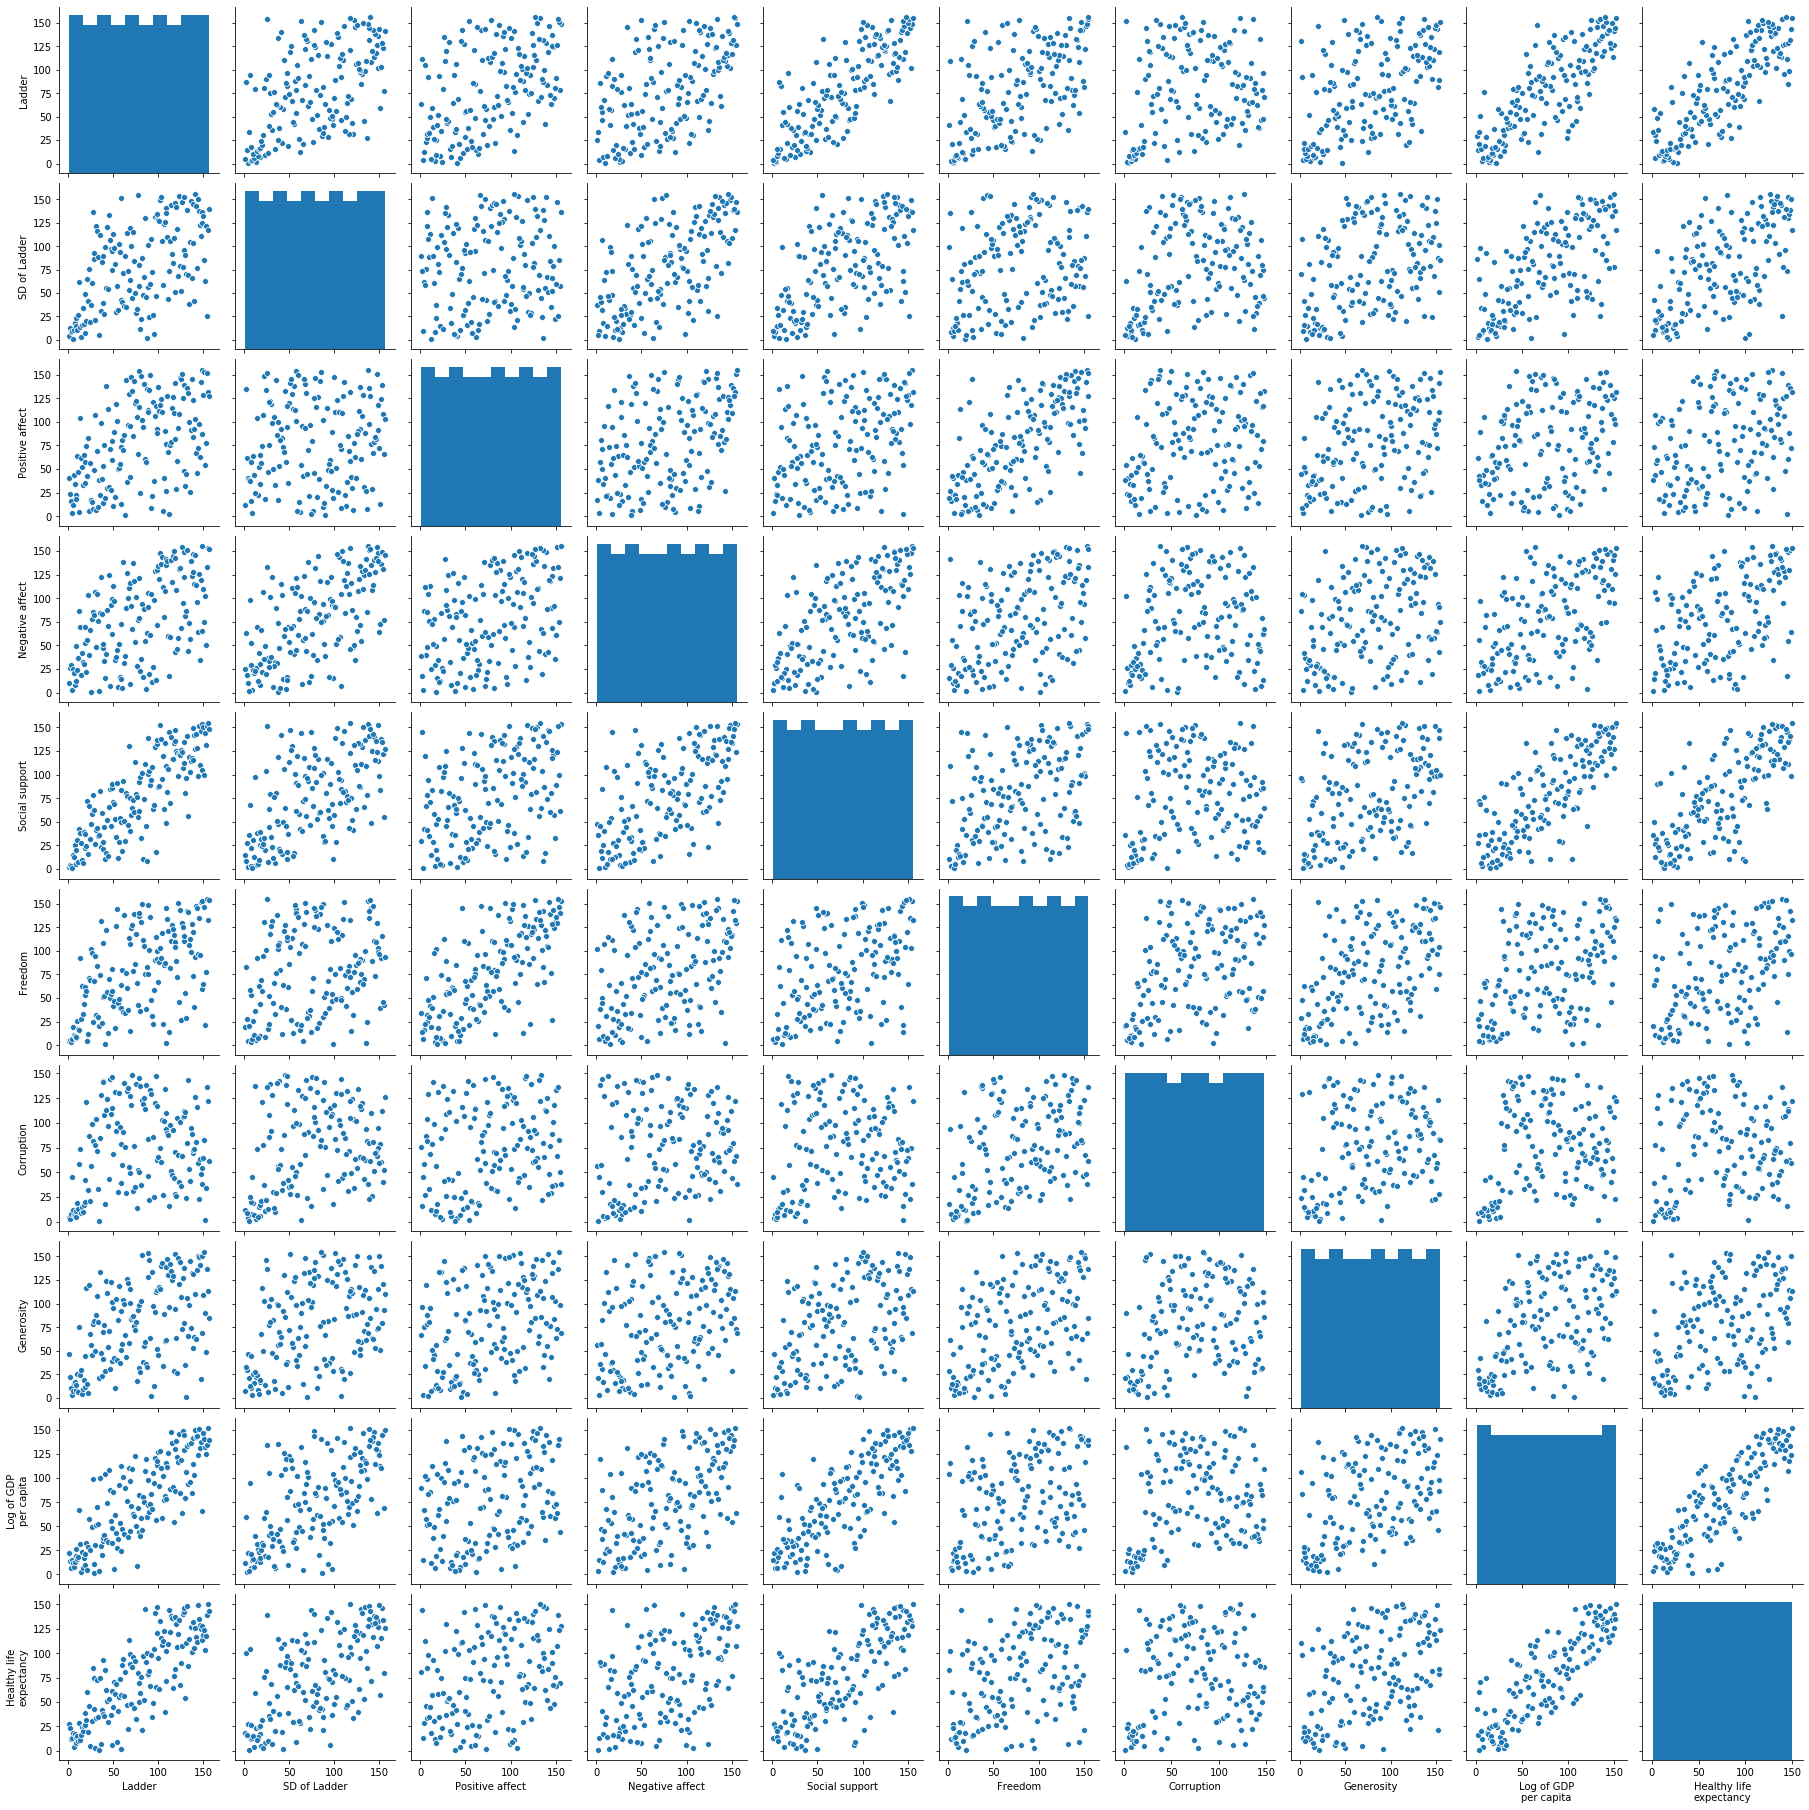

In [28]:
sns.pairplot(data)
# fig = sns.pairplot(data=data, hue='Country (region)')
# plt.show()

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [29]:
data.info()#Судя по колонке Corruption 8 в таблице отсутствующих значений, в country все значения.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [30]:
data['Country (region)'].isnull().sum()

0

Сколько стран в выборке? Написать ответ. 

In [31]:
len(data['Country (region)'].unique())#В выборке 156 стран

156

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [32]:
np.round_(data.corr(), decimals=2)
#Позитивный эффект больше всего зависит от свободы
#Негативный эффект зависит больше всего от социальной поддержки
#Социальная поддержка коррелирует с ВВП на душу населения
#Максимально щедрость коррелирует со свободой
#ВВП со здоровым образом жизни
#Коррупция в стране не зависит ни от чего.
#Вывод: коррелирующие признаки(я считала больше 0,7) Социальная поддержка. ВВП и здоровый образ жизни. 
#Счастливым себя можно ощущать независимо от всего остального, главное наличия свободы


,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.00,0.54,0.49,0.52,0.82,0.55,0.19,0.50,0.81,0.82
SD of Ladder,0.54,1.00,0.09,0.62,0.60,0.25,0.26,0.39,0.63,0.61
Positive affect,0.49,0.09,1.00,0.39,0.39,0.68,0.21,0.35,0.30,0.33
Negative affect,0.52,0.62,0.39,1.00,0.62,0.43,0.16,0.34,0.54,0.49
Social support,0.82,0.60,0.39,0.62,1.00,0.45,0.12,0.44,0.77,0.74
Freedom,0.55,0.25,0.68,0.43,0.45,1.00,0.38,0.49,0.41,0.42
Corruption,0.19,0.26,0.21,0.16,0.12,0.38,1.00,0.27,0.20,0.12
Generosity,0.50,0.39,0.35,0.34,0.44,0.49,0.27,1.00,0.48,0.43
Log of GDP\nper capita,0.81,0.63,0.30,0.54,0.77,0.41,0.20,0.48,1.00,0.85
Healthy life\nexpectancy,0.82,0.61,0.33,0.49,0.74,0.42,0.12,0.43,0.85,1.00


# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [33]:
# sample = []
# for i in range(10):
#     sample.append(np.random.choice(range(1,7)))
# sample
#или
data = np.random.randint(1, 7, 10)
data

array([5, 1, 2, 5, 2, 6, 3, 4, 5, 4])

Text(0.5, 1.0, 'Chart')

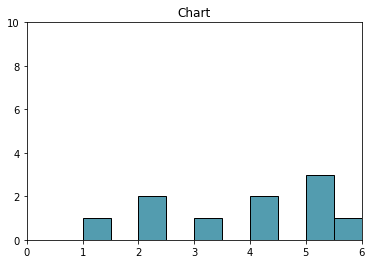

In [34]:
fig, ax = plt.subplots()
ax.hist(data,color = '#539caf',edgecolor="black")
ax.set_ylim(0,10)
ax.set_xlim(0,6)
ax.set_title('Chart')# Это случайное дискретное распределение(ничем другим описать не могу)

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

In [49]:
#Смоделируйте 1000 раз сумму по 100 подбрасываний - не знаю правильно ли я поняла постановку задачи
sum_data = []
for i in range(1000):
    data = np.random.randint(1, 7, 100)
    sum_data.append(data.sum())
#или так?
sum_data2 = []
for i in range(1000):
    data = np.random.randint(1, 7, 100)
    sum_data2.append(data.sum()/len(data))

Text(0.5, 1.0, 'Chart')

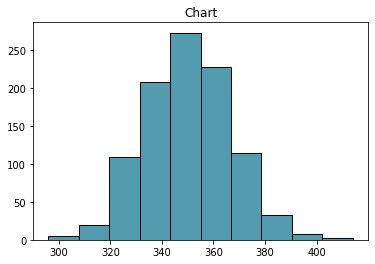

In [50]:
#Смоделируйте 1000 раз сумму по 100 подбрасываний - не знаю правильно ли я поняла постановку задачи, почему сумму, а не среднее?
fig, ax = plt.subplots()
ax.hist(sum_data,color = '#539caf',edgecolor="black")
ax.set_title('Chart')
#Это нормальное распределение

График изменился, потому что объем выборки увеличился с 10 до 100.
Центральная предельная теорема: распределение хорошо описывается нормальным при n>=30, у нас n = 100
(у нас же быборка объемом n=100? диапазон значений от 1 до 6, количество повторов испытания 1000) - поправьте,  если я не так поняла

Text(0.5, 1.0, 'Chart')

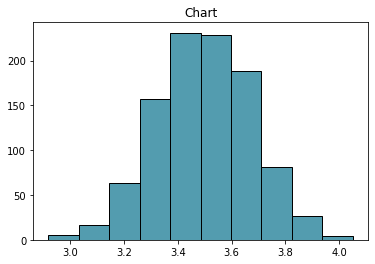

In [40]:
fig, ax = plt.subplots()
ax.hist(sum_data2,color = '#539caf',edgecolor="black")
ax.set_title('Chart')
#Это нормальное распределение